In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Remove all empty files
folder_path = '.'
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path) and os.path.getsize(file_path) < 5: # Less than 5 bytes
        os.remove(file_path)
        print(f'Deleted: {file_path}')

In [3]:
station_files = sorted(glob.glob('*.csv'))
station_files.remove('netatmo_stations.csv')
try:
    station_files.remove('temperatures.csv')
except:
    pass
try:
    station_files.remove('diff.csv')
except:
    pass
station_files

['70:ee:50:01:48:42.csv',
 '70:ee:50:01:90:02.csv',
 '70:ee:50:01:d8:9a.csv',
 '70:ee:50:02:1c:6a.csv',
 '70:ee:50:03:0e:de.csv',
 '70:ee:50:03:0f:04.csv',
 '70:ee:50:03:90:de.csv',
 '70:ee:50:03:bc:f6.csv',
 '70:ee:50:03:d1:a6.csv',
 '70:ee:50:03:d9:80.csv',
 '70:ee:50:05:c7:44.csv',
 '70:ee:50:05:e7:78.csv',
 '70:ee:50:12:68:3c.csv',
 '70:ee:50:17:4f:0c.csv',
 '70:ee:50:17:6e:bc.csv',
 '70:ee:50:17:9c:76.csv',
 '70:ee:50:17:ac:6c.csv',
 '70:ee:50:17:bd:00.csv',
 '70:ee:50:17:e7:3a.csv',
 '70:ee:50:17:e9:26.csv',
 '70:ee:50:17:ee:ac.csv',
 '70:ee:50:19:22:84.csv',
 '70:ee:50:19:c8:6c.csv',
 '70:ee:50:1a:fc:0a.csv',
 '70:ee:50:1c:3d:4e.csv',
 '70:ee:50:1c:60:d0.csv',
 '70:ee:50:1c:86:ae.csv',
 '70:ee:50:1e:13:56.csv',
 '70:ee:50:1f:75:84.csv',
 '70:ee:50:22:aa:5a.csv',
 '70:ee:50:27:14:a0.csv',
 '70:ee:50:27:29:66.csv',
 '70:ee:50:27:31:8e.csv',
 '70:ee:50:27:36:78.csv',
 '70:ee:50:27:82:0e.csv',
 '70:ee:50:28:94:de.csv',
 '70:ee:50:28:b6:90.csv',
 '70:ee:50:28:f9:82.csv',
 '70:ee:50:2

In [4]:
#for csv_file in station_files:
df = pd.read_csv(station_files[0], delimiter=',')
df.head()

,date,time,temp
0,2023-05-31,21:01:59,23.0
1,2023-05-31,21:12:13,22.9
2,2023-05-31,21:32:44,22.7
3,2023-05-31,21:42:59,22.6
4,2023-05-31,21:52:23,22.4


In [5]:
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
df.head(10)

,date,time,temp
0,2023-05-31,2023-05-31 21:01:59,23.0
1,2023-05-31,2023-05-31 21:12:13,22.9
2,2023-05-31,2023-05-31 21:32:44,22.7
3,2023-05-31,2023-05-31 21:42:59,22.6
4,2023-05-31,2023-05-31 21:52:23,22.4
5,2023-05-31,2023-05-31 22:07:46,22.2
6,2023-05-31,2023-05-31 22:18:01,22.1
7,2023-05-31,2023-05-31 22:28:16,22.0
8,2023-05-31,2023-05-31 22:38:32,21.9
9,2023-05-31,2023-05-31 22:47:56,21.7


In [6]:
df['hour'] = df['time'].dt.hour
df.head(10)

,date,time,temp,hour
0,2023-05-31,2023-05-31 21:01:59,23.0,21
1,2023-05-31,2023-05-31 21:12:13,22.9,21
2,2023-05-31,2023-05-31 21:32:44,22.7,21
3,2023-05-31,2023-05-31 21:42:59,22.6,21
4,2023-05-31,2023-05-31 21:52:23,22.4,21
5,2023-05-31,2023-05-31 22:07:46,22.2,22
6,2023-05-31,2023-05-31 22:18:01,22.1,22
7,2023-05-31,2023-05-31 22:28:16,22.0,22
8,2023-05-31,2023-05-31 22:38:32,21.9,22
9,2023-05-31,2023-05-31 22:47:56,21.7,22


In [7]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

# Apply the function to each row in the dataframe
closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

# Convert the result back into a dataframe
result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]
result.head(10)

/tmp/ipykernel_353316/710818299.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


,date,time,temp
0,2023-05-31,2023-05-31 21:01:59,23.0
1,2023-05-31,2023-05-31 22:07:46,22.2
2,2023-05-31,2023-05-31 23:08:25,21.5
3,2023-06-01,2023-06-01 00:09:06,20.9
4,2023-06-01,2023-06-01 01:04:39,20.1
5,2023-06-01,2023-06-01 02:05:19,19.4
6,2023-06-01,2023-06-01 03:05:07,18.8
7,2023-06-01,2023-06-01 04:05:48,18.7
8,2023-06-01,2023-06-01 05:06:28,18.6
9,2023-06-01,2023-06-01 06:02:01,18.9


In [8]:
result['time'] = result['time'].dt.hour
result.head()

,date,time,temp
0,2023-05-31,21,23.0
1,2023-05-31,22,22.2
2,2023-05-31,23,21.5
3,2023-06-01,0,20.9
4,2023-06-01,1,20.1


In [9]:
# Filter by date interval
start_date = '2023-06-01'
end_date = '2023-08-31'

result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
result.head()

,date,time,temp
3,2023-06-01,0,20.9
4,2023-06-01,1,20.1
5,2023-06-01,2,19.4
6,2023-06-01,3,18.8
7,2023-06-01,4,18.7


In [10]:
result.tail()

,date,time,temp
2206,2023-08-31,19,26.6
2207,2023-08-31,20,25.5
2208,2023-08-31,21,24.8
2209,2023-08-31,22,24.5
2210,2023-08-31,23,24.4


## Preprocess all stations

In [11]:
all_dataframes = []

In [12]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

for csv_file in station_files:
    print(f'Processing {csv_file}')
    df = pd.read_csv(csv_file, delimiter=',')
    df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
    df['hour'] = df['time'].dt.hour
    
    # Apply the function to each row in the dataframe
    closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

    # Convert the result back into a dataframe
    result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]

    # Get just the time
    result['time'] = result['time'].dt.hour
    
    # Filter by date interval
    start_date = '2023-06-01'
    end_date = '2023-08-31'
    result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
    #result['station'] = re.search(r"/([^/]+)\.csv$", csv_file).group(1)
    result['station'] = re.search(r"(.+)\.csv$", csv_file).group(1)

    all_dataframes.append(result)

Processing 70:ee:50:01:48:42.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:01:90:02.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:01:d8:9a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:02:1c:6a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:03:0e:de.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:03:0f:04.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:03:90:de.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:03:bc:f6.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:03:d1:a6.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:03:d9:80.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:05:c7:44.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:05:e7:78.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:68:3c.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:4f:0c.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:6e:bc.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:9c:76.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:ac:6c.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:bd:00.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:e7:3a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:e9:26.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:ee:ac.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:19:22:84.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:19:c8:6c.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1a:fc:0a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1c:3d:4e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1c:60:d0.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1c:86:ae.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1e:13:56.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1f:75:84.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:22:aa:5a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:27:14:a0.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:27:29:66.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:27:31:8e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:27:36:78.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:27:82:0e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:28:94:de.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:28:b6:90.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:28:f9:82.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:29:27:b6.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2b:32:1a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2b:3a:8a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2c:98:86.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2c:f5:2a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2d:03:4e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2e:e6:ca.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2e:e6:f8.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2e:f9:56.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2f:25:d6.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2f:2a:b2.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:32:d4:d2.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:36:d1:1c.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3a:31:20.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3b:e8:98.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3b:ea:38.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3b:ea:68.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3b:ed:56.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3c:23:7c.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3c:dd:7e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3c:f4:5e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3e:ed:3e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3f:10:72.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:58:a1:56.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:5f:01:fe.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:64:32:c6.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:6c:b0.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:7e:38.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:6b:35:64.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:6b:90:36.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:6b:a5:32.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:1e:54.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:20:7e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))
/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], 

Processing 70:ee:50:71:49:d8.csv
Processing 70:ee:50:71:56:d2.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:58:58.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:73:9a:76.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))
/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], 

Processing 70:ee:50:73:df:4c.csv
Processing 70:ee:50:73:f2:42.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:73:f5:4e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:73:f8:0e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:74:19:20.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:74:27:1a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7a:74:bc.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:8f:82.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:a3:78.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:ac:26.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:b1:b8.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:b7:00.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:b9:58.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:bb:24.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:cb:8a.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:d8:c8.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:83:80:ac.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:83:88:d4.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:83:8b:86.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:83:a6:2e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:84:47:e4.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:84:93:46.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:96:f5:96.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:96:f6:ac.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:a4:26:86.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:a4:63:6e.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:a4:85:16.csv


/tmp/ipykernel_353316/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


In [13]:
all_dataframes[0]

,date,time,temp,station
3,2023-06-01,0,20.9,70:ee:50:01:48:42
4,2023-06-01,1,20.1,70:ee:50:01:48:42
5,2023-06-01,2,19.4,70:ee:50:01:48:42
6,2023-06-01,3,18.8,70:ee:50:01:48:42
7,2023-06-01,4,18.7,70:ee:50:01:48:42
...,...,...,...,...
2206,2023-08-31,19,26.6,70:ee:50:01:48:42
2207,2023-08-31,20,25.5,70:ee:50:01:48:42
2208,2023-08-31,21,24.8,70:ee:50:01:48:42
2209,2023-08-31,22,24.5,70:ee:50:01:48:42


In [14]:
temperatures = pd.concat(all_dataframes, ignore_index=True)
temperatures.head()

,date,time,temp,station
0,2023-06-01,0,20.9,70:ee:50:01:48:42
1,2023-06-01,1,20.1,70:ee:50:01:48:42
2,2023-06-01,2,19.4,70:ee:50:01:48:42
3,2023-06-01,3,18.8,70:ee:50:01:48:42
4,2023-06-01,4,18.7,70:ee:50:01:48:42


In [15]:
temperatures.tail()

,date,time,temp,station
208939,2023-08-31,19,26.4,70:ee:50:a4:85:16
208940,2023-08-31,20,25.8,70:ee:50:a4:85:16
208941,2023-08-31,21,25.4,70:ee:50:a4:85:16
208942,2023-08-31,22,24.7,70:ee:50:a4:85:16
208943,2023-08-31,23,24.2,70:ee:50:a4:85:16


In [16]:
temperatures.to_csv('temperatures.csv', index=False)

## Quality Control

Baseline defined in the paper "Citizen data for global mapping of atmospheric urban heat islands"

In [17]:
temperatures.shape

(208944, 4)

In [18]:
# Remove values below -20ºC and above 45ºC
temperatures = temperatures[(temperatures['temp'] >= -20) & (temperatures['temp'] <= 45)]
temperatures.shape

(208739, 4)

In [19]:
# Keep only rows where the temperature difference is within ±thresholdºC
threshold = 10
# Define a function to filter each station's data
def filter_station_data(station_df):
    station_df = station_df.copy()  # Avoid modifying the original dataframe
    station_df['temp_diff_prev'] = station_df['temp'].diff()
    station_df['temp_diff_next'] = station_df['temp'].diff(-1)
    
    # Keep only rows where the temperature difference is within ±thresholdºC
    filtered = station_df[(station_df['temp_diff_prev'].abs() <= threshold) & (station_df['temp_diff_next'].abs() <= threshold)]
    
    return filtered.drop(columns=["temp_diff_prev", "temp_diff_next"])

# Apply filtering per station
temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)
temperatures.shape

/tmp/ipykernel_353316/3283187688.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)


(208314, 4)

In [20]:
# Detect outliers checking the data distribution using z-score

# Group by date and time, then compute the mean and standard deviation of temp
grouped = temperatures.groupby(['date', 'time'])['temp'].agg(['mean', 'std'])

# Merge the mean and std back to the original dataframe
temperatures = temperatures.merge(grouped, on=['date', 'time'])

# Compute the Z-score
temperatures['z_score'] = (temperatures['temp'] - temperatures['mean']) / temperatures['std']

# Remove rows where the z-score value is outside the range between -2.32 and 1.64
temperatures = temperatures[(temperatures['z_score'].abs() >= -2.32) & ((temperatures['z_score'].abs() <= 1.64))]
temperatures.shape

(192231, 7)

In [21]:
# Remove unnecessary columns
temperatures = temperatures.drop(columns=['z_score', 'mean', 'std'])
temperatures

,date,time,temp,station
0,2023-06-01,1,20.1,70:ee:50:01:48:42
1,2023-06-01,2,19.4,70:ee:50:01:48:42
2,2023-06-01,3,18.8,70:ee:50:01:48:42
3,2023-06-01,4,18.7,70:ee:50:01:48:42
4,2023-06-01,5,18.6,70:ee:50:01:48:42
...,...,...,...,...
208309,2023-08-31,18,27.2,70:ee:50:a4:85:16
208310,2023-08-31,19,26.4,70:ee:50:a4:85:16
208311,2023-08-31,20,25.8,70:ee:50:a4:85:16
208312,2023-08-31,21,25.4,70:ee:50:a4:85:16


## Compute temperature differences

In [22]:
ref_stations = [
    '70:ee:50:96:b5:46', # Xalets de Lladró
    '70:ee:50:17:9c:76', # Urbanització El Pedregal
    '70:ee:50:74:27:1a', # Urbanització Monte Rosado
    '70:ee:50:7f:f2:14', # Bungalows Park Albufera
    '70:ee:50:19:22:84'  # Serra Perenxisa
]

In [23]:
# Merge the dataframe with itself to compute the difference with the reference station
#df_ref = temperatures[temperatures['station'] == '70:ee:50:7a:d1:ce'][['date', 'time', 'temp']].rename(columns={'temp': 'temp_ref'})
df_ref = (
    temperatures[temperatures['station'].isin(ref_stations)]
    .groupby(['date', 'time'])['temp']
    .mean()
    .reset_index()
    .rename(columns={'temp': 'temp_ref'})
)
df_merged = pd.merge(temperatures, df_ref, on=['date', 'time'])
df_merged

,date,time,temp,station,temp_ref
0,2023-06-01,1,20.1,70:ee:50:01:48:42,18.733333
1,2023-06-01,2,19.4,70:ee:50:01:48:42,18.600000
2,2023-06-01,3,18.8,70:ee:50:01:48:42,18.566667
3,2023-06-01,4,18.7,70:ee:50:01:48:42,18.666667
4,2023-06-01,5,18.6,70:ee:50:01:48:42,18.500000
...,...,...,...,...,...
192226,2023-08-31,18,27.2,70:ee:50:a4:85:16,26.300000
192227,2023-08-31,19,26.4,70:ee:50:a4:85:16,25.133333
192228,2023-08-31,20,25.8,70:ee:50:a4:85:16,24.566667
192229,2023-08-31,21,25.4,70:ee:50:a4:85:16,24.100000


In [24]:
# Compute the daily temperature difference from reference station for each station
df_merged['temp_diff'] = df_merged['temp'] - df_merged['temp_ref']
df_merged

,date,time,temp,station,temp_ref,temp_diff
0,2023-06-01,1,20.1,70:ee:50:01:48:42,18.733333,1.366667
1,2023-06-01,2,19.4,70:ee:50:01:48:42,18.600000,0.800000
2,2023-06-01,3,18.8,70:ee:50:01:48:42,18.566667,0.233333
3,2023-06-01,4,18.7,70:ee:50:01:48:42,18.666667,0.033333
4,2023-06-01,5,18.6,70:ee:50:01:48:42,18.500000,0.100000
...,...,...,...,...,...,...
192226,2023-08-31,18,27.2,70:ee:50:a4:85:16,26.300000,0.900000
192227,2023-08-31,19,26.4,70:ee:50:a4:85:16,25.133333,1.266667
192228,2023-08-31,20,25.8,70:ee:50:a4:85:16,24.566667,1.233333
192229,2023-08-31,21,25.4,70:ee:50:a4:85:16,24.100000,1.300000


In [25]:
#df_merged.to_csv('df_merged.csv')

In [26]:
#threshold = 5
#df_filtered = df_merged[(df_merged['temp_diff'] >= -threshold) & (df_merged['temp_diff'] <= threshold)]
df_filtered = df_merged

In [27]:
# Remove rows where 'station' is in the list
df_filtered = df_filtered[~df_filtered['station'].isin(ref_stations)]

In [28]:
df_filtered

,date,time,temp,station,temp_ref,temp_diff
0,2023-06-01,1,20.1,70:ee:50:01:48:42,18.733333,1.366667
1,2023-06-01,2,19.4,70:ee:50:01:48:42,18.600000,0.800000
2,2023-06-01,3,18.8,70:ee:50:01:48:42,18.566667,0.233333
3,2023-06-01,4,18.7,70:ee:50:01:48:42,18.666667,0.033333
4,2023-06-01,5,18.6,70:ee:50:01:48:42,18.500000,0.100000
...,...,...,...,...,...,...
192226,2023-08-31,18,27.2,70:ee:50:a4:85:16,26.300000,0.900000
192227,2023-08-31,19,26.4,70:ee:50:a4:85:16,25.133333,1.266667
192228,2023-08-31,20,25.8,70:ee:50:a4:85:16,24.566667,1.233333
192229,2023-08-31,21,25.4,70:ee:50:a4:85:16,24.100000,1.300000


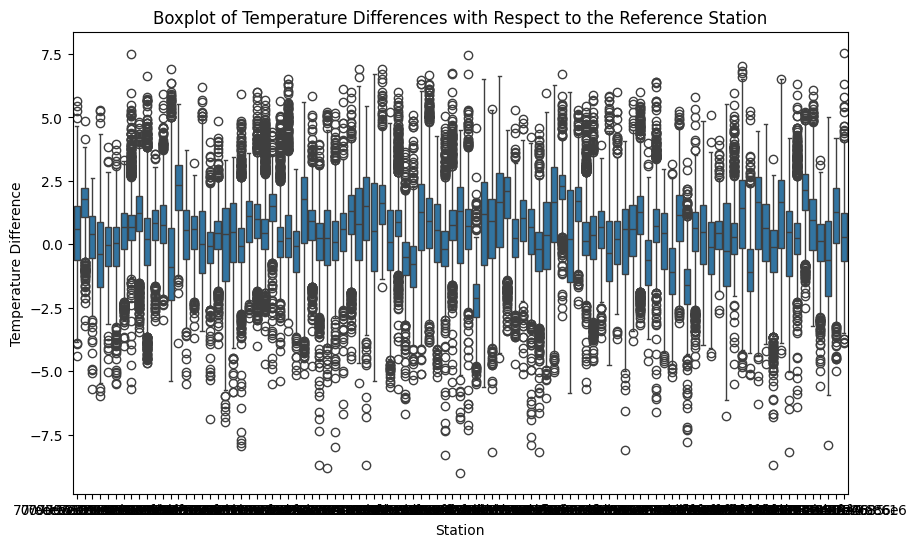

In [29]:
# Create a boxplot for each station showing the temperature differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='temp_diff', data=df_filtered)

plt.title('Boxplot of Temperature Differences with Respect to the Reference Station')
plt.xlabel('Station')
plt.ylabel('Temperature Difference')

plt.show()

In [30]:
df_merged['temp'].max()

45.0

In [31]:
# Compute mean
df_filtered = df_filtered.groupby('station')['temp_diff'].mean().reset_index()
df_filtered

,station,temp_diff
0,70:ee:50:01:48:42,0.402993
1,70:ee:50:01:90:02,1.580154
2,70:ee:50:01:d8:9a,0.227288
3,70:ee:50:02:1c:6a,-0.474448
4,70:ee:50:03:0e:de,-0.119192
...,...,...
94,70:ee:50:96:f5:96,0.851404
95,70:ee:50:96:f6:ac,-0.010176
96,70:ee:50:a4:26:86,-0.544638
97,70:ee:50:a4:63:6e,0.945430


## Add coordinates

In [32]:
stations = pd.read_csv('netatmo_stations.csv')
stations

,device_id,module_id,lon,lat
0,70:ee:50:17:e9:26,02:00:00:17:e2:aa,-0.472264,39.260814
1,70:ee:50:6b:35:64,02:00:00:6b:78:60,-0.472086,39.264747
2,70:ee:50:3c:dd:7e,02:00:00:3c:fb:52,-0.467302,39.260201
3,70:ee:50:a4:63:6e,02:00:00:a4:1c:50,-0.416428,39.292213
4,70:ee:50:84:95:f6,02:00:00:84:7c:38,-0.290545,39.303333
...,...,...,...,...
131,70:ee:50:64:41:6e,02:00:00:64:06:f8,-0.623403,39.570579
132,70:ee:50:2f:2a:b2,02:00:00:2f:3a:a6,-0.582213,39.593958
133,70:ee:50:05:e7:78,02:00:00:05:ff:fe,-0.589590,39.600114
134,70:ee:50:17:ac:6c,02:00:00:19:34:02,-0.589313,39.600057


In [33]:
stations = stations.drop(columns=['module_id'])
stations

,device_id,lon,lat
0,70:ee:50:17:e9:26,-0.472264,39.260814
1,70:ee:50:6b:35:64,-0.472086,39.264747
2,70:ee:50:3c:dd:7e,-0.467302,39.260201
3,70:ee:50:a4:63:6e,-0.416428,39.292213
4,70:ee:50:84:95:f6,-0.290545,39.303333
...,...,...,...
131,70:ee:50:64:41:6e,-0.623403,39.570579
132,70:ee:50:2f:2a:b2,-0.582213,39.593958
133,70:ee:50:05:e7:78,-0.589590,39.600114
134,70:ee:50:17:ac:6c,-0.589313,39.600057


In [34]:
data = pd.merge(df_filtered, stations, left_on='station', right_on='device_id')
data.head()

,station,temp_diff,device_id,lon,lat
0,70:ee:50:01:48:42,0.402993,70:ee:50:01:48:42,-0.716436,39.472366
1,70:ee:50:01:90:02,1.580154,70:ee:50:01:90:02,-0.465100,39.435280
2,70:ee:50:01:d8:9a,0.227288,70:ee:50:01:d8:9a,-0.507079,39.561247
3,70:ee:50:02:1c:6a,-0.474448,70:ee:50:02:1c:6a,-0.582163,39.273848
4,70:ee:50:03:0e:de,-0.119192,70:ee:50:03:0e:de,-0.577037,39.547075


In [35]:
data = data.drop(columns=['device_id'])
data.head()

,station,temp_diff,lon,lat
0,70:ee:50:01:48:42,0.402993,-0.716436,39.472366
1,70:ee:50:01:90:02,1.580154,-0.465100,39.435280
2,70:ee:50:01:d8:9a,0.227288,-0.507079,39.561247
3,70:ee:50:02:1c:6a,-0.474448,-0.582163,39.273848
4,70:ee:50:03:0e:de,-0.119192,-0.577037,39.547075


In [36]:
data.to_csv('diff.csv', index=False)